<center>
    <h1 style="font-weight: bold;">
    Binary Classification from Tabular Data 
    <br>
    </h1>
    <h1>
    (amriz's version)
    </h1>
</center>

## **Library Import**

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from utils.preprocessing import FeatureScaler

from IPython.display import display, HTML

from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

## **Data Loading**

In [2]:
data_path = './data/EV_data.csv'
initial_df = pd.read_csv(data_path)

## **Data Understanding**

### **Deskripsi Data**

Memberikan gambaran umum tentang data yang akan digunakan.

#### **1. Memahami Struktur Data**

In [3]:
# Struktur Data
initial_df.head()

,read_date,interval_1,interval_2,interval_3,interval_4,interval_5,interval_6,interval_7,interval_8,interval_9,...,interval_41,interval_42,interval_43,interval_44,interval_45,interval_46,interval_47,interval_48,id,label
0,3/1/2021,0.0625,0.0500,0.0687,0.0750,0.0687,0.0500,0.0625,0.0687,0.0687,...,0.0812,0.0687,0.0687,0.0562,0.0562,0.0687,0.0687,0.0625,1,1
1,3/2/2021,0.0625,0.0500,0.0687,0.0625,0.0625,0.0562,0.0562,0.0625,0.0687,...,0.1375,0.0750,0.0687,0.0625,0.0625,0.0562,0.0625,0.0625,1,1
2,3/3/2021,0.0625,0.0687,0.0500,0.0562,0.0687,0.0625,0.0625,0.0625,0.0500,...,0.1875,0.1062,0.0750,0.0687,0.0687,0.0625,0.0562,0.0562,1,1
3,3/4/2021,0.0625,0.0625,0.0687,0.0500,0.0562,0.0625,0.0625,0.0625,0.0562,...,0.1125,0.0875,0.0687,0.0625,0.0562,0.0625,0.0625,0.0687,1,1
4,3/5/2021,0.0625,0.0625,0.0500,0.0625,0.0687,0.0625,0.0687,0.0562,0.0500,...,0.0812,0.0562,0.0687,0.0625,0.0625,0.0625,0.0562,0.0500,1,1


In [4]:
initial_df['read_date'].unique()

array(['3/1/2021', '3/2/2021', '3/3/2021', '3/4/2021', '3/5/2021',
       '3/6/2021', '3/7/2021', '3/8/2021', '3/9/2021', '3/10/2021',
       '3/11/2021', '3/12/2021', '3/13/2021', '3/14/2021', '3/15/2021',
       '3/16/2021', '3/17/2021', '3/18/2021', '3/19/2021', '3/20/2021',
       '3/21/2021', '3/22/2021', '3/23/2021', '3/24/2021', '3/25/2021',
       '3/26/2021', '3/27/2021', '3/28/2021', '3/29/2021', '3/30/2021',
       '3/31/2021', '4/1/2021', '4/2/2021', '4/3/2021', '4/4/2021',
       '4/5/2021', '4/6/2021', '4/7/2021', '4/8/2021', '4/9/2021',
       '4/10/2021', '4/11/2021', '4/12/2021', '4/13/2021', '4/14/2021',
       '4/15/2021', '2/18/2021 0:00', '2/19/2021 0:00', '2/20/2021 0:00',
       '2/21/2021 0:00', '2/22/2021 0:00', '2/23/2021 0:00',
       '2/24/2021 0:00', '2/25/2021 0:00', '2/26/2021 0:00',
       '2/27/2021 0:00', '2/28/2021 0:00', '3/1/2021 0:00',
       '3/2/2021 0:00', '3/3/2021 0:00', '3/4/2021 0:00', '3/5/2021 0:00',
       '3/6/2021 0:00', '3/7/2021 0:00'

In [5]:
print(f"Jumlah data: {initial_df.shape[0]}")
print(f"Jumlah kolom: {initial_df.shape[1]}")
print(initial_df.dtypes)

Jumlah data: 4048
Jumlah kolom: 51
read_date       object
interval_1     float64
interval_2     float64
interval_3     float64
interval_4     float64
interval_5     float64
interval_6     float64
interval_7     float64
interval_8     float64
interval_9     float64
interval_10    float64
interval_11    float64
interval_12    float64
interval_13    float64
interval_14    float64
interval_15    float64
interval_16    float64
interval_17    float64
interval_18    float64
interval_19    float64
interval_20    float64
interval_21    float64
interval_22    float64
interval_23    float64
interval_24    float64
interval_25    float64
interval_26    float64
interval_27    float64
interval_28    float64
interval_29    float64
interval_30    float64
interval_31    float64
interval_32    float64
interval_33    float64
interval_34    float64
interval_35    float64
interval_36    float64
interval_37    float64
interval_38    float64
interval_39    float64
interval_40    float64
interval_41    float64

#### **2. Menentukan Variabel Target**

In [6]:
numerical_columns = initial_df.select_dtypes(include=[np.float64]).columns
categorical_columns = ['id']
date_columns = ['read_date']
label_column = ['label']

#### **3. Memeriksa Nilai Ringkasan Statistik**

In [7]:
# Statistik Deskriptif Numerikal
display(HTML(initial_df.describe().to_html()))

,interval_1,interval_2,interval_3,interval_4,interval_5,interval_6,interval_7,interval_8,interval_9,interval_10,interval_11,interval_12,interval_13,interval_14,interval_15,interval_16,interval_17,interval_18,interval_19,interval_20,interval_21,interval_22,interval_23,interval_24,interval_25,interval_26,interval_27,interval_28,interval_29,interval_30,interval_31,interval_32,interval_33,interval_34,interval_35,interval_36,interval_37,interval_38,interval_39,interval_40,interval_41,interval_42,interval_43,interval_44,interval_45,interval_46,interval_47,interval_48,id,label
count,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.00000,4048.000000
mean,0.344301,0.320546,0.297221,0.276360,0.255266,0.244258,0.250251,0.251163,0.255017,0.230583,0.217867,0.238736,0.257309,0.295889,0.288309,0.283624,0.283028,0.272364,0.263760,0.260320,0.251750,0.251437,0.250036,0.258450,0.251384,0.261171,0.260740,0.261707,0.265499,0.275546,0.282772,0.293687,0.312935,0.340652,0.374661,0.399541,0.422568,0.432408,0.426493,0.422762,0.407895,0.402141,0.392470,0.367511,0.359634,0.341184,0.381160,0.365073,44.50000,0.500000
std,0.698534,0.655992,0.607303,0.554286,0.492384,0.461366,0.598976,0.606699,0.616976,0.426445,0.388668,0.342023,0.328390,0.405575,0.380756,0.400106,0.430066,0.447352,0.471054,0.461368,0.462819,0.479617,0.475716,0.482956,0.478675,0.516921,0.523557,0.516714,0.516509,0.537958,0.541808,0.537004,0.533615,0.552876,0.622922,0.627571,0.632085,0.625359,0.620732,0.629121,0.587563,0.593329,0.607965,0.577805,0.614594,0.622205,0.773924,0.745274,25.40491,0.500062
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000
25%,0.073000,0.072000,0.070000,0.069000,0.066000,0.066000,0.064000,0.066000,0.064000,0.065000,0.068000,0.074000,0.086000,0.087500,0.075000,0.061750,0.050000,0.043000,0.031200,0.025000,0.025000,0.018925,0.018700,0.018700,0.012500,0.012500,0.012500,0.018700,0.020425,0.025000,0.035000,0.037500,0.043700,0.060000,0.072000,0.093700,0.112500,0.120000,0.127000,0.125000,0.121000,0.118700,0.113000,0.105000,0.088000,0.081200,0.077000,0.075000,22.75000,0.000000
50%,0.137500,0.131200,0.125000,0.125000,0.125000,0.118700,0.118700,0.118700,0.118700,0.118700,0.118700,0.131200,0.154000,0.168700,0.162500,0.156200,0.150000,0.131200,0.123000,0.115000,0.112500,0.106200,0.107000,0.112500,0.112000,0.110000,0.112500,0.111000,0.112500,0.119000,0.120000,0.125000,0.137000,0.156200,0.175000,0.205000,0.225000,0.247000,0.245000,0.243700,0.228500,0.218700,0.206200,0.195000,0.175000,0.156200,0.150000,0.143700,44.50000,0.500000
75%,0.250000,0.237500,0.225000,0.218700,0.212500,0.208250,0.200000,0.200000,0.206200,0.212000,0.212500,0.243700,0.290000,0.337500,0.333000,0.337500,0.312500,0.293000,0.272000,0.276250,0.256200,0.243700,0.247250,0.250000,0.237500,0.243700,0.238250,0.243175,0.250000,0.269000,0.277000,0.285250,0.309500,0.374250,0.431200,0.468700,0.475000,0.487500,0.487125,0.468700,0.450000,0.431200,0.412500,0.395250,0.352750,0.310250,0.293700,0.266500,66.25000,1.000000
max,8.325000,12.712500,12.400000,12.387500,9.200000,8.350000,12.100000,12.212500,12.200000,12.

In [8]:
# Distribusi Frekuesi Kategorikal
sorted_df = initial_df['id'].value_counts().to_frame().sort_index()
sorted_df.columns = ['frequency']
display(HTML(sorted_df.to_html()))

,frequency
id,
1,46
2,46
3,46
4,46
5,46
6,46
7,46
8,46
9,46


Value Counts for 'label':
  1: 2024 (50.00%)
  0: 2024 (50.00%)


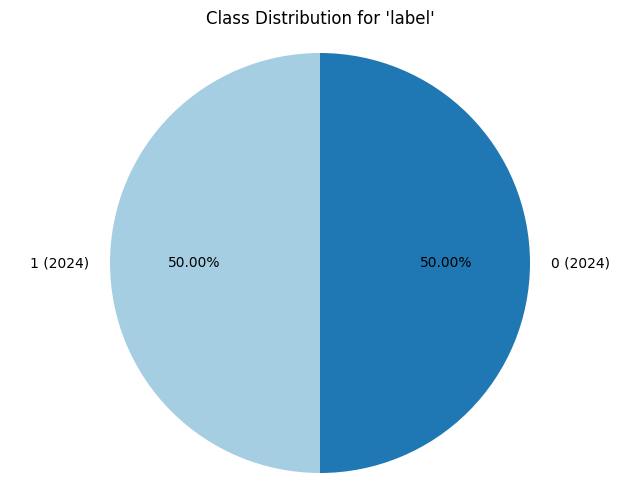

In [9]:
def plot_pie_chart(df, label):
    """
    This function plots a pie chart for the class distribution in the label column
    and prints the value counts for each class in a nicely formatted way, 
    without modifying the original DataFrame.
    
    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    label (str): The column name for the label/class to be plotted.
    """
    # Replace NaN with 'NaN' for plotting only, without modifying the original df
    plot_data = df[label].fillna('NaN')

    # Get the value counts of the label
    class_counts = plot_data.value_counts()  # NaN values are replaced with 'Missing'
    total = len(plot_data)

    # Print the value counts with percentages in a more readable format
    print(f"Value Counts for '{label}':")
    for cls, count in class_counts.items():
        percentage = (count / total) * 100
        print(f"  {cls}: {count} ({percentage:.2f}%)")
    
    # Plot the pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(class_counts, labels=[f'{cls} ({count})' for cls, count in class_counts.items()],
            autopct=lambda p: f'{p:.2f}%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(f"Class Distribution for '{label}'")
    plt.axis('equal')  # Ensures the pie chart is a circle
    plt.show()

# Distribusi Frekuensi Label
plot_pie_chart(initial_df, 'label')

### **Eksplorasi Data**

Untuk memahami struktur, mengidentikasi pola, tren, dan korelasi dalam data.

#### **Analisa Statistik Deskriptif Lanjutan**

Skewness: Untuk mengetahui seberapa simetris distribusi data.

<!-- TODO: To Be Continued... -->
TODO: To Be Continued...

### **Verifikasi Kualitas Data**

Untuk memastikan bahwa data yang digunakan bersih, konsisten, dan dapat diandalkan.

#### **1. Identifikasi Missing Values**


In [10]:
def missing_value_stats(df):
    missing_percentage = (df.isnull().sum() / len(df)) * 100

    # Create a DataFrame with missing counts and percentages
    missing_data = pd.DataFrame({
        'Missing Count': df.isnull().sum(),
        'Missing Percentage': missing_percentage.round(2).astype(str) + '%',
    })

    return missing_data

In [11]:
# Missing Value
missing_value_stats(initial_df)

,Missing Count,Missing Percentage
read_date,0,0.0%
interval_1,0,0.0%
interval_2,0,0.0%
interval_3,0,0.0%
interval_4,0,0.0%
interval_5,0,0.0%
interval_6,0,0.0%
interval_7,0,0.0%
interval_8,0,0.0%
interval_9,0,0.0%


#### **2. Identifikasi Duplikasi Data**

In [12]:
def duplicate_stats(df):
    # Find the duplicated rows
    duplicated_rows = df[df.duplicated()]

    # Find the duplicated columns
    duplicated_columns = df.columns[df.columns.duplicated()]

    return duplicated_rows, duplicated_columns


In [13]:
# Duplicate Data
duplicate_rows, duplicate_columns = duplicate_stats(initial_df)
print(f"Duplicate Rows: {len(duplicate_rows)}")
print(f"Duplicate Columns: {len(duplicate_columns)}")

Duplicate Rows: 0
Duplicate Columns: 0


#### **3. Identikasi Konsisetensi Data**

In [14]:
# Check numerical columns for negative values
def check_negative_values(df, numerical_columns):
    negative_values = {}
    for col in numerical_columns:
        negative_values[col] = df[df[col] < 0].shape[0]

    return negative_values

In [15]:
# Check Negative Values
negative_values = check_negative_values(initial_df, numerical_columns)
print("Negative Values:")
for col, count in negative_values.items():
    print(f"  {col}: {count}")

Negative Values:
  interval_1: 0
  interval_2: 0
  interval_3: 0
  interval_4: 0
  interval_5: 0
  interval_6: 0
  interval_7: 0
  interval_8: 0
  interval_9: 0
  interval_10: 0
  interval_11: 0
  interval_12: 0
  interval_13: 0
  interval_14: 0
  interval_15: 0
  interval_16: 0
  interval_17: 0
  interval_18: 0
  interval_19: 0
  interval_20: 0
  interval_21: 0
  interval_22: 0
  interval_23: 0
  interval_24: 0
  interval_25: 0
  interval_26: 0
  interval_27: 0
  interval_28: 0
  interval_29: 0
  interval_30: 0
  interval_31: 0
  interval_32: 0
  interval_33: 0
  interval_34: 0
  interval_35: 0
  interval_36: 0
  interval_37: 0
  interval_38: 0
  interval_39: 0
  interval_40: 0
  interval_41: 0
  interval_42: 0
  interval_43: 0
  interval_44: 0
  interval_45: 0
  interval_46: 0
  interval_47: 0
  interval_48: 0


#### **4. Identifikasi Format Data**

In [16]:
# Check Unique Values for read_date
unique_dates = initial_df['read_date'].unique()
unique_dates

array(['3/1/2021', '3/2/2021', '3/3/2021', '3/4/2021', '3/5/2021',
       '3/6/2021', '3/7/2021', '3/8/2021', '3/9/2021', '3/10/2021',
       '3/11/2021', '3/12/2021', '3/13/2021', '3/14/2021', '3/15/2021',
       '3/16/2021', '3/17/2021', '3/18/2021', '3/19/2021', '3/20/2021',
       '3/21/2021', '3/22/2021', '3/23/2021', '3/24/2021', '3/25/2021',
       '3/26/2021', '3/27/2021', '3/28/2021', '3/29/2021', '3/30/2021',
       '3/31/2021', '4/1/2021', '4/2/2021', '4/3/2021', '4/4/2021',
       '4/5/2021', '4/6/2021', '4/7/2021', '4/8/2021', '4/9/2021',
       '4/10/2021', '4/11/2021', '4/12/2021', '4/13/2021', '4/14/2021',
       '4/15/2021', '2/18/2021 0:00', '2/19/2021 0:00', '2/20/2021 0:00',
       '2/21/2021 0:00', '2/22/2021 0:00', '2/23/2021 0:00',
       '2/24/2021 0:00', '2/25/2021 0:00', '2/26/2021 0:00',
       '2/27/2021 0:00', '2/28/2021 0:00', '3/1/2021 0:00',
       '3/2/2021 0:00', '3/3/2021 0:00', '3/4/2021 0:00', '3/5/2021 0:00',
       '3/6/2021 0:00', '3/7/2021 0:00'

#### **5. Identifikasi Anomali Data (Outliers)**

In [17]:
def plot_boxplot(data, numerical_features, title, label=None):
    """
    Fungsi untuk memplot boxplot menggunakan sns.boxplot
    Args:
    - data: DataFrame yang berisi data
    - numerical_features: Daftar nama fitur numerik yang ingin diplot
    - title: Judul dari plot

    Output:
    - Plot boxplot untuk setiap fitur numerik
    """

    if label:
        numerical_features = numerical_features.copy()
        numerical_features.append(label)

    plt.figure(figsize=(20, 40))
    
    # Looping untuk setiap fitur numerik
    for i, feature in enumerate(numerical_features, 1):
        plt.subplot(16, 3, i)  # Mengatur layout menjadi (7, 2)
        sns.boxplot(x=data[feature])
        plt.title(f'Boxplot of {feature}')
        plt.grid(True)
    
    plt.suptitle(title, fontsize=20, y=0.99)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

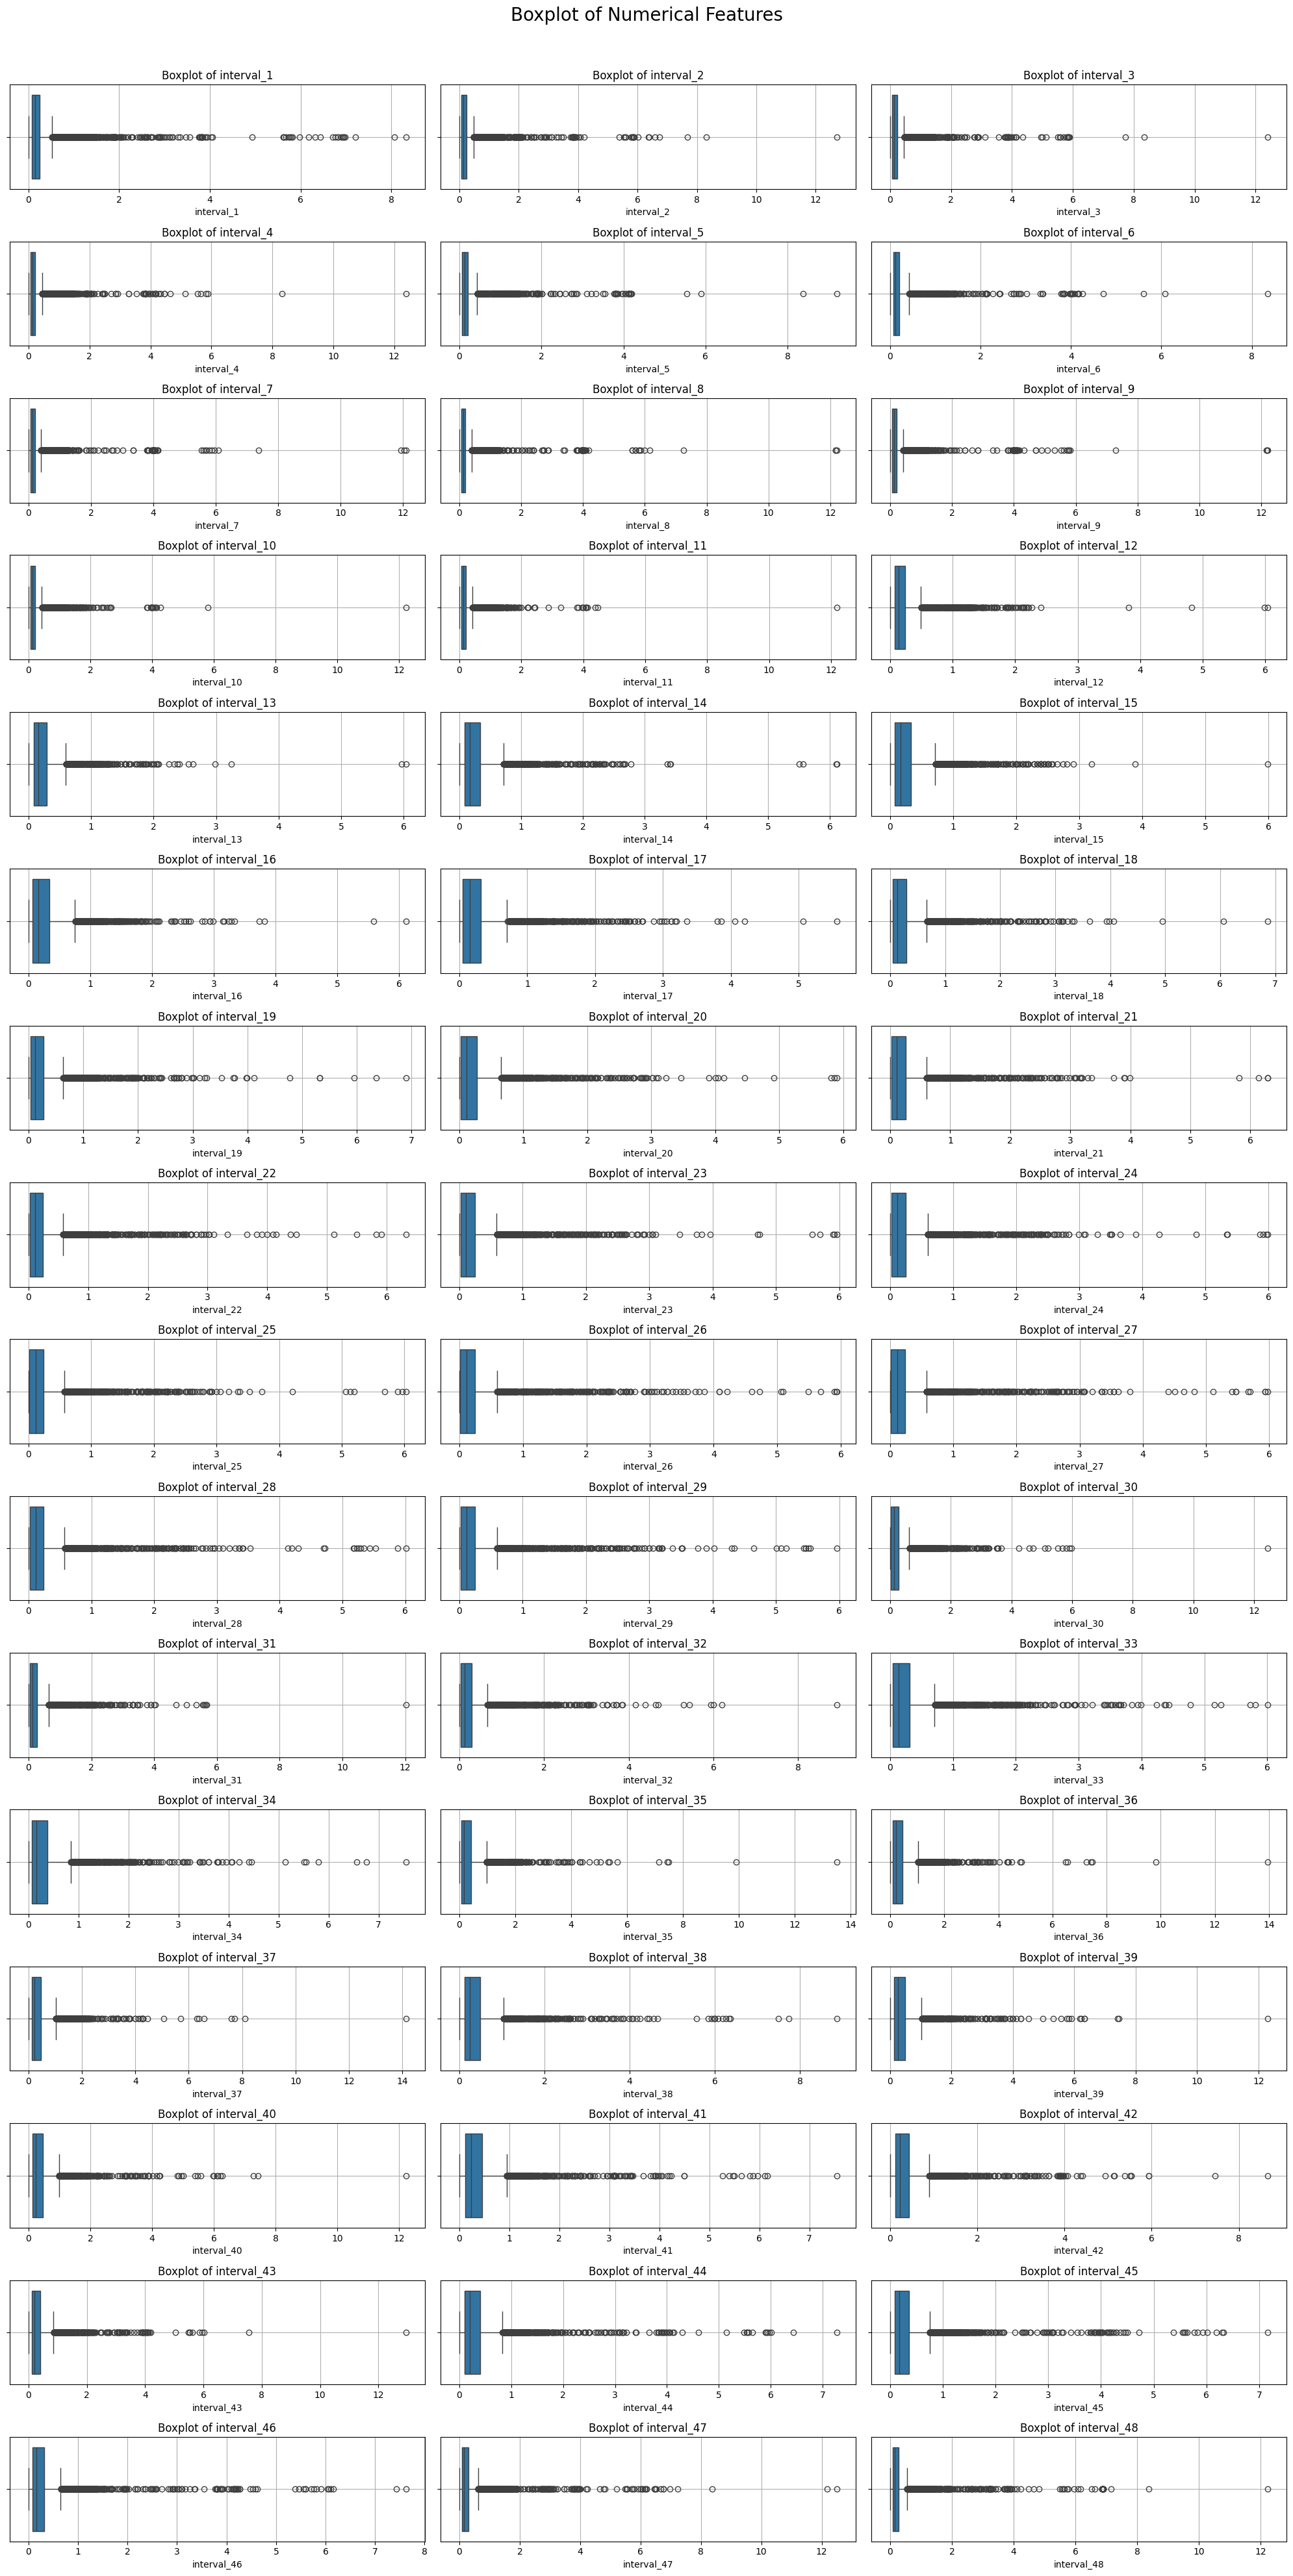

In [18]:
# Identifikasi Outliers Menggunakan Boxplot
plot_boxplot(initial_df, numerical_columns, 'Boxplot of Numerical Features')

## **Data Preparation**

### **Pemilihan Data**

#### **1. Record Selection**

Tidak dilakukan dengan asumsi semua data yang ada akan digunakan.

#### **2. Feature Selection**

In [19]:
numerical_columns = initial_df.select_dtypes(include=[np.float64]).columns
categorical_columns = ['id']
label_column = ['label']

X = initial_df[numerical_columns]
y = initial_df[label_column]

### **Perbaikan Data**

#### **1. Mengisi Missing Values**

Tidak dilakukan sebab tidak ada missing values.

#### **2. Penghapusan Duplikasi Data**
Tidak dilakukan sebab tidak ada duplikasi data.

#### **3. Penanganan Outliers**
Tidak dilakukan sebab outlier dapat memberikan informasi yang berharga.

#### **4. Perbaikan Error**

In [20]:
# Memperbaiki konsistensi format date

# Buat salinan DataFrame
df_errors_handled = initial_df.copy()

# Hilangkan bagian waktu dari kolom 'read_date' jika ada
df_errors_handled['read_date'] = df_errors_handled['read_date'].str.split(' ').str[0]

# Konversikan ke format datetime
df_errors_handled['read_date'] = pd.to_datetime(df_errors_handled['read_date'], format='%m/%d/%Y', errors='coerce')

# Gunakan .normalize() untuk mengatur waktu menjadi 00:00:00
df_errors_handled['read_date'] = df_errors_handled['read_date'].dt.normalize()

# Periksa hasil akhir
print(df_errors_handled.dtypes)

read_date      datetime64[ns]
interval_1            float64
interval_2            float64
interval_3            float64
interval_4            float64
interval_5            float64
interval_6            float64
interval_7            float64
interval_8            float64
interval_9            float64
interval_10           float64
interval_11           float64
interval_12           float64
interval_13           float64
interval_14           float64
interval_15           float64
interval_16           float64
interval_17           float64
interval_18           float64
interval_19           float64
interval_20           float64
interval_21           float64
interval_22           float64
interval_23           float64
interval_24           float64
interval_25           float64
interval_26           float64
interval_27           float64
interval_28           float64
interval_29           float64
interval_30           float64
interval_31           float64
interval_32           float64
interval_3

### **Konstruksi Data (Training Set & Testing Set)**

#### **1. Train-Test Split**

Memisahkan data menjadi data training dan data testing, untuk mencegah leakage.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing: {X_test.shape[0]}")

Jumlah data training: 3643
Jumlah data testing: 405


#### **2. Encoding Categorical Data**

Tidak dilakukan sebab data sudah dalam bentuk numerik.

#### **3. Normalization**

In [22]:
feature_scaler = FeatureScaler()

# Fit the scaler on the training data
X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

Normal features (StandardScaler): []
Non-normal features (MinMaxScaler): ['interval_1', 'interval_2', 'interval_3', 'interval_4', 'interval_5', 'interval_6', 'interval_7', 'interval_8', 'interval_9', 'interval_10', 'interval_11', 'interval_12', 'interval_13', 'interval_14', 'interval_15', 'interval_16', 'interval_17', 'interval_18', 'interval_19', 'interval_20', 'interval_21', 'interval_22', 'interval_23', 'interval_24', 'interval_25', 'interval_26', 'interval_27', 'interval_28', 'interval_29', 'interval_30', 'interval_31', 'interval_32', 'interval_33', 'interval_34', 'interval_35', 'interval_36', 'interval_37', 'interval_38', 'interval_39', 'interval_40', 'interval_41', 'interval_42', 'interval_43', 'interval_44', 'interval_45', 'interval_46', 'interval_47', 'interval_48']


#### **3. Feature Engineering**

Menggunakan teknik feature engineering dengan melakukan clustering menggunakan 2 metode yaitu KMeans dan BIRCH.

**Pipeline:** Means Grouping by id → PCA → CLustering

## **Modelling**

Menggunakan 2 pendekatan model yaitu, Logistic Regression dan K-Nearest Neighbors.

### **Proses Pelatihan**

### **Proses Pengujian**

## **Model Evaluation**

### **Mengukur Performansi Model**

### **Menilai Apakah Proses Sudah Maksimal (Room for Improvement)**